## GeoQueries

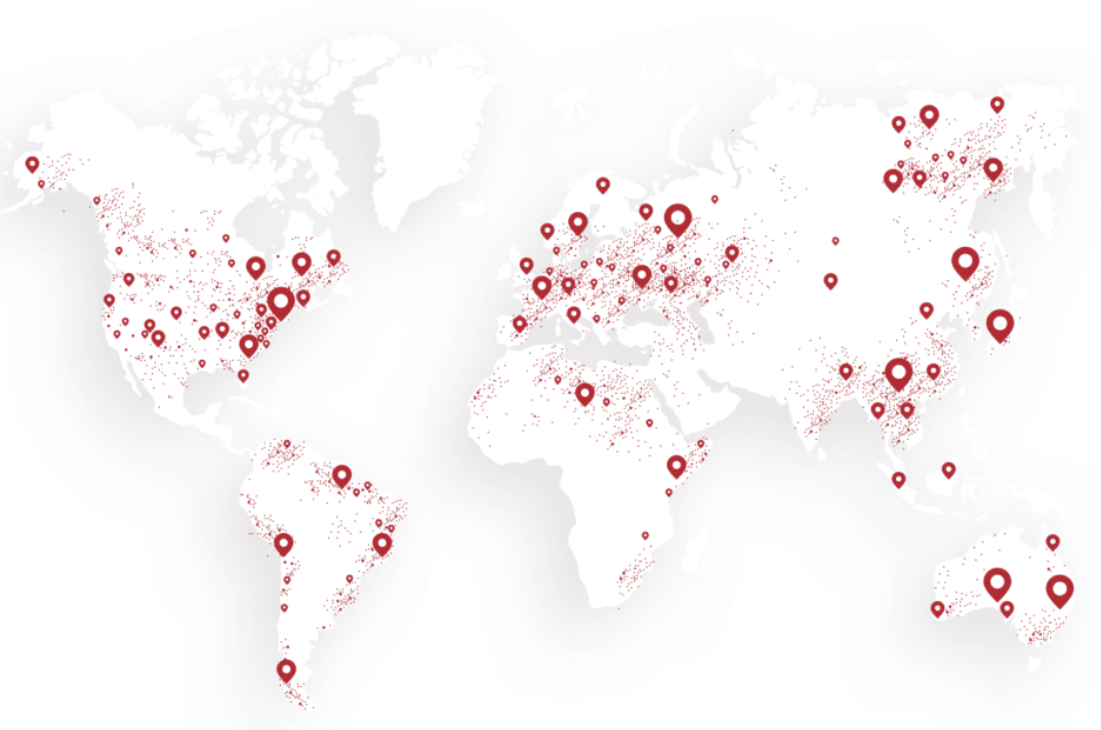

The coordinates are in the city of San Francisco 

### Libraries

In [2]:
from pymongo import GEOSPHERE
import pandas as pd
import requests
import json
from pymongo import MongoClient
import geopandas
import scr.limpieza as l
from functools import reduce
import operator

### Connection with Mongodb

In [3]:
conn = MongoClient("localhost:27017")
db = conn.get_database("ironhack")

In [4]:
df = pd.read_csv("dataset/df.csv")
df.head()

,company_name,city,latitude,longitude,zip_code
0,Joost,New York,40.746497,-74.009447,10011-6903
1,Kyte,San Francisco,37.788482,-122.409173,94102
2,Stickam,Los Angeles,34.051409,-118.254558,90071
3,Livestream,New York,40.726155,-73.995625,10011
4,Ustream,San Francisco,37.392936,-122.079480,94107


In [5]:
#We are going to create a geo-index so Mongo knows that we want to geo-query this collection.
db.companies2.create_index([("geometry", GEOSPHERE)])

'geometry_2dsphere'

In [6]:
collection = db.get_collection("companies2")

In [7]:
collection.find_one({})

{'_id': ObjectId('607d4c2863ff4769b41bdf3d'),
 'name': 'Starbucks',
 'location': {'type': 'Point', 'coordinates': [-122.453203, 37.78622]},
 'local': 'starbucks'}

In [8]:
list_ = ['San Francisco']
df_ = l.create(df,'city',list_)
df_.head()

,company_name,city,latitude,longitude,zip_code
1,Kyte,San Francisco,37.788482,-122.409173,94102
4,Ustream,San Francisco,37.392936,-122.079480,94107
6,Revision3,San Francisco,37.757758,-122.388243,94107
7,CastTV,San Francisco,37.780716,-122.393913,94107
8,blinkx,San Francisco,37.793819,-122.395089,94105


In [9]:
latitude_ = list(df_.latitude)
longitude_ = list(df_.longitude)

In [10]:
#I wanted to do a search of all joint latitudes and longitudes but I don't know why it gave me an error
comb = []
combinado = zip(latitude_, longitude_)
for i in combinado:
    coord = [longitude_, latitude_]
    comb.append({"type": "Point",  "coordinates": coord})

In [11]:
df_['geometry'] = comb

<ipython-input-11-322de36a6271>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_['geometry'] = comb


In [12]:
df_.head()

,company_name,city,latitude,longitude,zip_code,geometry
1,Kyte,San Francisco,37.788482,-122.409173,94102,"{'type': 'Point', 'coordinates': [[-122.409173..."
4,Ustream,San Francisco,37.392936,-122.079480,94107,"{'type': 'Point', 'coordinates': [[-122.409173..."
6,Revision3,San Francisco,37.757758,-122.388243,94107,"{'type': 'Point', 'coordinates': [[-122.409173..."
7,CastTV,San Francisco,37.780716,-122.393913,94107,"{'type': 'Point', 'coordinates': [[-122.409173..."
8,blinkx,San Francisco,37.793819,-122.395089,94105,"{'type': 'Point', 'coordinates': [[-122.409173..."


1. Kyte

In [13]:
coord = [-122.409173, 37.788482]
c = {"type": "Point",  "coordinates": coord}

In [14]:
query = {"location": {"$near": {"$geometry": c, "$maxDistance": 2000}}}
final_q1 = list(collection.find(query))

In [51]:
df_q = pd.DataFrame(final_q1)

In [16]:
df_q.local.value_counts()

starbucks    28
vegan        21
travel        2
Name: local, dtype: int64

2. Cast-tv

In [17]:
coord1 = [-122.393913, 37.780716]
c1 = {"type": "Point",  "coordinates": coord1}

In [18]:
query = {"location": {"$near": {"$geometry": c1, "$maxDistance": 2000}}}
final_q = list(collection.find(query))

In [19]:
df_c1 = pd.DataFrame(final_q)
df_c1.local.value_counts()

starbucks    26
Name: local, dtype: int64

3. Blinkx

In [20]:
coord2 = [-122.395089, 37.793819]
c2 = {"type": "Point",  "coordinates": coord2}

In [21]:
query = {"location": {"$near": {"$geometry": c2, "$maxDistance": 2000}}}
final_q = collection.find(query)

In [22]:
df_c2 = pd.DataFrame(final_q)
df_c2.local.value_counts()

starbucks    24
vegan         2
Name: local, dtype: int64

4. Curse

In [23]:
coord3 = [-122.399972, 37.787092]
c3 = {"type": "Point",  "coordinates": coord3}

In [24]:
query4 = {"location": {"$near": {"$geometry": c3, "$maxDistance": 2000}}}
final_4 = collection.find(query4)

In [25]:
df_c3 = pd.DataFrame(final_4)
df_c3.local.value_counts()

starbucks    27
vegan        11
travel        2
Name: local, dtype: int64

5. IODA

In [26]:
coord4 = [-122.396744, 37.780134]
c4 = {"type": "Point",  "coordinates": coord4}

In [27]:
query5 = {"location": {"$near": {"$geometry": c4, "$maxDistance": 2000}}}
final_5 = collection.find(query5)

In [28]:
df_c4 = pd.DataFrame(final_5)
df_c4.local.value_counts()

starbucks    27
vegan         2
Name: local, dtype: int64

6. Kongregate

In [29]:
coord5 = [-122.401245, 37.786942]
c5 =  {"type": "Point",  "coordinates": coord5}

In [30]:
query6 = {"location": {"$near": {"$geometry": c5, "$maxDistance": 2000}}}
final_6 = collection.find(query6)

In [31]:
df_c5 = pd.DataFrame(final_6)
df_c5.local.value_counts()

starbucks    27
vegan        12
travel        2
Name: local, dtype: int64

7. DanceJam

In [32]:
coord6 = [-122.407959, 37.781557]
c6 =  {"type": "Point",  "coordinates": coord6}

In [33]:
query7 = {"location": {"$near": {"$geometry": c6, "$maxDistance": 2000}}}
final_7 = collection.find(query7)

In [34]:
df_c6 = pd.DataFrame(final_7)
df_c6.local.value_counts()

starbucks    27
vegan        20
travel        2
Name: local, dtype: int64

8. Mevio

In [35]:
coord7 = [-122.392142, 37.782263]
c7 =  {"type": "Point",  "coordinates": coord7}

In [36]:
query8 = {"location": {"$near": {"$geometry": c7, "$maxDistance": 2000}}}
final_8 = collection.find(query8)

In [37]:
df_c7 = pd.DataFrame(final_8)
df_c7.local.value_counts()

starbucks    25
Name: local, dtype: int64

9. Crunchyroll	 

In [38]:
coord8 = [-122.393229, 37.781265]
c8 =  {"type": "Point",  "coordinates": coord8}
query9 = {"location": {"$near": {"$geometry": c8, "$maxDistance": 2000}}}
final_9 = collection.find(query9)
df_c8 = pd.DataFrame(final_9)
df_c8.local.value_counts()

starbucks    26
Name: local, dtype: int64

10. Rupture

In [39]:
coord9 = [-122.395234, 37.783898]
c9 =  {"type": "Point",  "coordinates": coord9}
query10 = {"location": {"$near": {"$geometry": c9, "$maxDistance": 2000}}}
final_10 = collection.find(query10)
df_c9 = pd.DataFrame(final_10)
df_c9.local.value_counts()

starbucks    25
vegan         1
Name: local, dtype: int64

`I have chosen 10 companies with more starbucks, vegan and travel near`

In [40]:
kyte_df = df_q.drop(['_id'], axis=1)
kyte_df.head()

,name,location,local
0,Starbucks,"{'type': 'Point', 'coordinates': [-122.4084517...",starbucks
1,Starbucks,"{'type': 'Point', 'coordinates': [-122.4075222...",starbucks
2,Starbucks,"{'type': 'Point', 'coordinates': [-122.4106742...",starbucks
3,Starbucks,"{'type': 'Point', 'coordinates': [-122.40682, ...",starbucks
4,Starbucks,"{'type': 'Point', 'coordinates': [-122.40906, ...",starbucks


In [43]:
latitude = [lat["location"]["coordinates"][1]for lat in final_q1]
longitude = [lon["location"]["coordinates"][0]for lon in final_q1]

df_q['latitude'] = latitude
df_q['longitude'] = longitude

In [47]:
final_df = df_q.drop(['_id', 'location'], axis=1)

In [49]:
final_df.to_csv("dataset/kytecompany.csv")